Загрузка данных и первичный осмотр

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [170]:
df = pd.read_csv('S02-hw-dataset.csv')
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [172]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [173]:
df.dtypes

user_id        int64
age          float64
country       object
purchases      int64
revenue        int64
dtype: object

Пропуски, дубликаты и базовый контроль качества

In [174]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [175]:
sum(df.duplicated())

1

In [176]:
def is_divergent(idx: int, row: pd.Series) -> str: 
    s = []
    if pd.isna(row).any():
        s.append('Has nan')
    if (not(8 < row.iloc[1] < 110) or row.iloc[3] < 0) and not pd.isna(row).any():
        s.append('Abnormal value')
    if (row.iloc[3] > 0 and row.iloc[4] <= 0):
        s.append('Contradiction')
    if df.duplicated()[idx]:
        s.append('Dublicate')
    return ', '.join(s)

In [177]:
# вывод подозрительных строк
ct = 0
idx_to_drop = []
print("Дефектные строки:")
for idx, row in df.iterrows():
    error = is_divergent(idx, row)
    if error:
        ct += 1
        print(f'{np.array(row)} Key Error: {error}')
        idx_to_drop.append(idx)
print(f"Всего: {ct}")

Дефектные строки:
[5 nan 'DE' 6 1296] Key Error: Has nan
[6 120.0 'FR' -1 785] Key Error: Abnormal value
[11 24.0 'US' 4 0] Key Error: Contradiction
[13 nan 'US' 9 630] Key Error: Has nan
[21 5.0 'RU' 8 1488] Key Error: Abnormal value
[10 24.0 'RU' 7 511] Key Error: Dublicate
Всего: 6


Обнаруженные проблемы качества датасета:
- строчки с пропущенным значением age (2);
- строчки-дубликаты (1);
- строчки с аномальными значениями (1);
- строчки с логическим противоречием (1);

In [178]:
df_cleared = df.drop(idx_to_drop).reset_index()
df_cleared

,index,user_id,age,country,purchases,revenue
0,0,1,25.0,FR,7,749
1,1,2,24.0,RU,5,1115
2,2,3,52.0,FR,7,399
3,3,4,31.0,RU,6,654
4,6,7,46.0,RU,0,0
5,7,8,28.0,CN,2,456
6,8,9,39.0,US,4,980
7,9,10,24.0,RU,7,511
8,11,12,20.0,CN,7,1652
9,13,14,36.0,DE,9,2358


Базовый EDA: группировки, агрегаты и частоты

In [179]:
def stats_for_group(group: pd.DataFrame) -> None: 
    print(group.size())
    for name, group in group:
        print('-----------------------')
        print(f"""Group: {name}
Mean revenue: {group.revenue.mean():.2f}
Median revenue: {group.revenue.median():.2f}
Sum purchases: {group.purchases.sum():.2f}""")

In [180]:
stats_for_group(df_cleared.groupby('country'))

country
CN     2
DE     5
FR    11
RU    11
US     6
dtype: int64
-----------------------
Group: CN
Mean revenue: 1054.00
Median revenue: 1054.00
Sum purchases: 9.00
-----------------------
Group: DE
Mean revenue: 1475.40
Median revenue: 1104.00
Sum purchases: 33.00
-----------------------
Group: FR
Mean revenue: 666.00
Median revenue: 546.00
Sum purchases: 52.00
-----------------------
Group: RU
Mean revenue: 752.00
Median revenue: 650.00
Sum purchases: 47.00
-----------------------
Group: US
Mean revenue: 638.17
Median revenue: 636.50
Sum purchases: 24.00


Доминирующие по численности категории и наибольшее количество покупок - пользователи из России и Франции.
Наибольший средний и медианный доход - Германия и Китай. 
Россия, Франция и США имеют сопоставимые значения дохода

In [181]:
df_cleared_groupby_age = df_cleared.copy()
labels = ['18-31', '32-44', '45-57']
df_cleared_groupby_age['age_cat'] = pd.cut(df_cleared['age'], bins=3, labels=labels)
stats_for_group(df_cleared_groupby_age.groupby('age_cat'))

age_cat
18-31    14
32-44    11
45-57    10
dtype: int64
-----------------------
Group: 18-31
Mean revenue: 645.79
Median revenue: 580.50
Sum purchases: 59.00
-----------------------
Group: 32-44
Mean revenue: 1274.09
Median revenue: 980.00
Sum purchases: 65.00
-----------------------
Group: 45-57
Mean revenue: 585.60
Median revenue: 418.00
Sum purchases: 41.00


C:\Users\user\AppData\Local\Temp\ipykernel_172060\1974049167.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_for_group(df_cleared_groupby_age.groupby('age_cat'))


Выборка по возрасту довольно равномерна, численность незначительно уменьшается  по мере увеличения возраста.
Средний и медианный доход и количество покупок по убыванию - 32-44, 18-31, 45-57

Визуализация данных в Matplotlib

Гистограмма для количественного признака

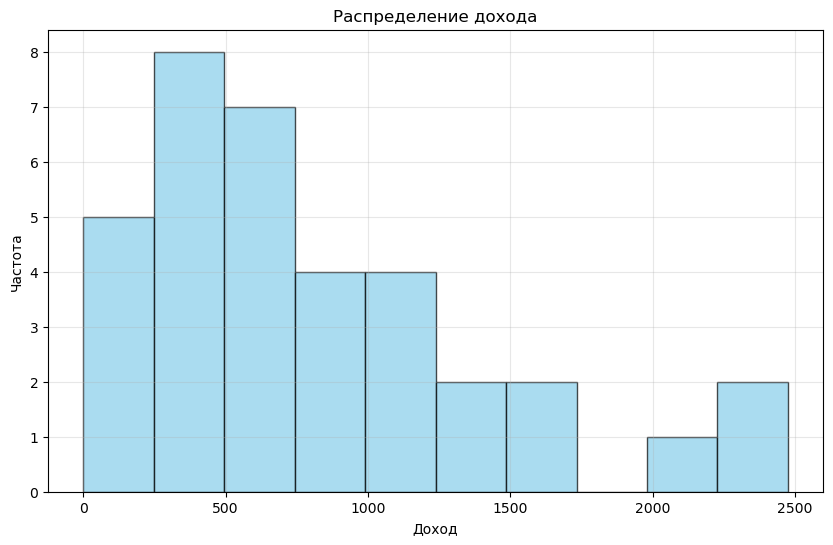

In [182]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleared['revenue'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение дохода')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.grid(alpha=0.3)
plt.show()

По диаграмме можно сказать, что большая часть значений дохода находится в пределах от 250 до 750 и далее по нисходящей

Боксплот (boxplot) для количественного признака

<Figure size 1200x600 with 0 Axes>

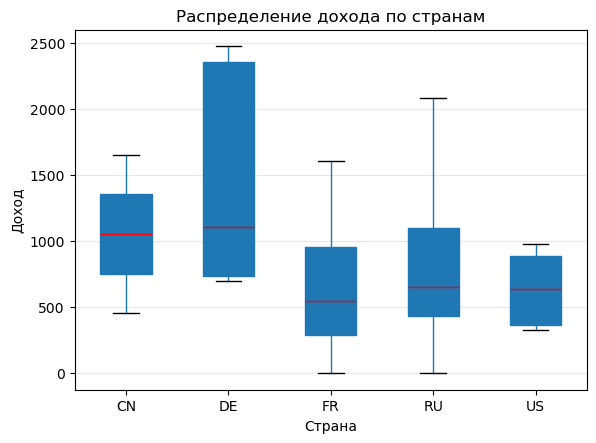

In [183]:
plt.figure(figsize=(12, 6))
df_cleared.boxplot(column='revenue', by='country', grid=False, 
               patch_artist=True, medianprops={'color': 'red'})

plt.title('Распределение дохода по странам')
plt.suptitle('')  
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.grid(alpha=0.3, axis='y')
plt.show()

Размах дохода в Германии, Франции и России больше разброса в Китае и США; несмотря на схожие медианные значения Китая и Германии, рапсределение дохода в Китае (и США) близко к нормальному, в то время как в Германии (Франции и России) ближе к экспоненциальному.

Scatter plot (диаграмма рассеяния) для пары количественных признаков и сохранение графика

Сохранено: purchases_on_revenue.png


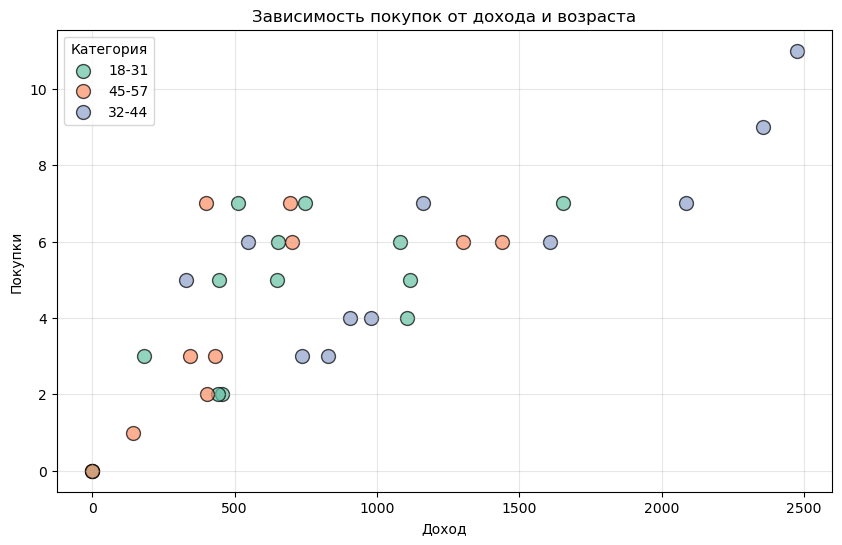

In [184]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

# Цвета для каждой возрастной категории (аналог palette='Set2')
age_categories = df_cleared_groupby_age['age_cat'].unique()
set_colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Рисуем точки для каждой категории
for i, age_cat in enumerate(age_categories):
    subset = df_cleared_groupby_age[df_cleared_groupby_age['age_cat'] == age_cat]
    plt.scatter(subset['revenue'], subset['purchases'],
                color=set_colors[i % len(set_colors)],
                label=age_cat,
                s=100,
                alpha=0.7,
                edgecolor='black')

plt.title('Зависимость покупок от дохода и возраста')
plt.xlabel('Доход')
plt.ylabel('Покупки')
plt.grid(alpha=0.3)
plt.legend(title='Категория')

filename = f'purchases_on_revenue.png'
plt.savefig(f'figures/{filename}', dpi=300, bbox_inches='tight', facecolor='white')
print(f'Сохранено: {filename}')

plt.show()

По графику видно, что количество покупок растет пропорционально доходу, таким образом пользователям в возрасте от 32 до 44 соответсвует наибольшее количество покупок